#Домашнее задание. Композиция алгоритмов

[`data_train.csv`](https://drive.google.com/file/d/1qKakViWhNT1yTiM66V9hxADAVCYTL0PO/view?usp=share_link)

[`data_scoring.csv`](https://drive.google.com/file/d/1tguHTZm9-sUwTRzqAEuqLRUzKHqkvVmQ/view?usp=share_link)

##Часть 1. Загрузка и обработка данных

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!gdown 1qKakViWhNT1yTiM66V9hxADAVCYTL0PO #эта команда скачивает файл data_train.csv и помещает его в корневую директорию Colab

Downloading...
From: https://drive.google.com/uc?id=1qKakViWhNT1yTiM66V9hxADAVCYTL0PO
To: /content/data_train.csv
100% 1.40M/1.40M [00:00<00:00, 76.0MB/s]


In [3]:
data = pd.read_csv('data_train.csv')
data.shape

(14734, 14)

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14734 non-null  int64 
 1   workclass       14734 non-null  object
 2   fnlwgt          14734 non-null  int64 
 3   education       14734 non-null  object
 4   education-num   14734 non-null  int64 
 5   marital-status  14734 non-null  object
 6   occupation      14734 non-null  object
 7   relationship    14734 non-null  object
 8   race            14734 non-null  object
 9   sex             14734 non-null  object
 10  capital-gain    14734 non-null  int64 
 11  capital-loss    14734 non-null  int64 
 12  hours-per-week  14734 non-null  int64 
 13  >50K,<=50K      14734 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.6+ MB


### Задание
* Заменить все знаки "?" на np.nan

In [6]:
for column in data.columns:
    data[column] = data[column].apply(lambda x: np.nan if x == '?' else x)

* Найти все столбцы со значением NaN. Напечатать их

In [7]:
for column in data.columns:
    if data[column].isnull().sum() != 0:
        print(column)

workclass
occupation


* Выделить вектор ответов. Закодировать 
    * '<=50K' -> 0;
    * '>50K' -> 1.
* Сохранить вектор в переменную y типа np.array.

In [8]:
y = data['>50K,<=50K'].apply(lambda x: 0 if x == '<=50K' else 1)
y = np.asarray(y)

* Удалить из data правильные ответы

In [9]:
del data['>50K,<=50K']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14734 entries, 0 to 14733
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14734 non-null  int64 
 1   workclass       13874 non-null  object
 2   fnlwgt          14734 non-null  int64 
 3   education       14734 non-null  object
 4   education-num   14734 non-null  int64 
 5   marital-status  14734 non-null  object
 6   occupation      13870 non-null  object
 7   relationship    14734 non-null  object
 8   race            14734 non-null  object
 9   sex             14734 non-null  object
 10  capital-gain    14734 non-null  int64 
 11  capital-loss    14734 non-null  int64 
 12  hours-per-week  14734 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.5+ MB


**Вопрос.** Какие из признаков вещественны

Выделить вещественные(численные) и категориальные признаки

In [11]:
real_columns = [column for column in data.columns if np.dtype(data[column]) != 'object']
print(real_columns)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [12]:
cat_columns = [column for column in data.columns if np.dtype(data[column]) == 'object']
print(cat_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']


In [13]:
len(real_columns) + len(cat_columns) == len(data.columns)

True

In [14]:
real_data = data[real_columns]
real_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


In [15]:
cat_data = data[cat_columns]
cat_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex
0,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male
1,Private,Some-college,Divorced,Sales,Not-in-family,White,Male
2,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Own-child,White,Male
3,Private,Some-college,Never-married,Sales,Own-child,White,Female
4,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male


### Задание
Выделить One-hot признаки из данных с помощью объекта `OneHotEncoder` из модуля `sklearn.preprocessing`.

In [16]:
from sklearn.preprocessing import OneHotEncoder

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59'],
      dtype='object')

In [38]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
one_hot_data = ohe.fit_transform(cat_data.values)
one_hot_data = pd.DataFrame(one_hot_data, index=cat_data.index)
one_hot_data.columns = one_hot_data.columns.astype(str)
one_hot_data.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Разобьем данные на train  и test в соотношение 70:30

In [133]:
from sklearn.model_selection import train_test_split 

train_data, test_data, train_real_data, test_real_data, \
train_cat_data, test_cat_data, train_one_hot_data, test_one_hot_data, \
y_train, y_test = train_test_split(data, real_data, 
                                   cat_data, one_hot_data, 
                                   y, train_size=0.7)

###Задание
Проделать тоже самое с scorind_data.
* Загрузить данные из файла data_scoring.csv
* Заменить "?" на np.nan
* Выделить числовые и категориальные данные
* Закодировть категориальные данные с помощью `OneHotEncoding`

In [41]:
!gdown 1tguHTZm9-sUwTRzqAEuqLRUzKHqkvVmQ

Downloading...
From: https://drive.google.com/uc?id=1tguHTZm9-sUwTRzqAEuqLRUzKHqkvVmQ
To: /content/data_scoring.csv
100% 139k/139k [00:00<00:00, 75.2MB/s]


In [117]:
#Загрузка
scoring_data = pd.read_csv('data_scoring.csv')
#Замена
for column in scoring_data.columns:
    scoring_data[column] = scoring_data[column].apply(lambda x: np.nan if x == '?' else x)
#Выделение
real_columns = [column for column in scoring_data.columns if np.dtype(data[column]) == 'int64']
scoring_real_data = scoring_data[real_columns]
cat_columns = [column for column in scoring_data.columns if np.dtype(data[column]) == 'object']
scoring_cat_data = scoring_data[cat_columns]
#Кодировка
scoring_one_hot_data = ohe.transform(scoring_cat_data.values)
scoring_one_hot_data = pd.DataFrame(scoring_one_hot_data, index=scoring_cat_data.index)

##Часть 2. Обучение случайного леса
В `sklearn` по умолчанию невозможно использовать категориальные признаки. Поэтому будут использованы `train/test_one_hot_data`

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
train_data_for_forest = pd.concat([train_real_data, train_one_hot_data], axis='columns') 
test_data_for_forest = pd.concat([test_real_data, test_one_hot_data], axis='columns')

### Задание 
Выбрать оптиманьные параметр глубины от 3 до 19 для случайного леса. Использовать кросс-валидацию. Для каждой глубины посчтитать среднее по фолдам значение метрики ROC-AUC и записать получившиеся данные в массив `rf_metrics`. Использовать 5 фолдов для кросс-валидации

In [64]:
depths = np.arange(3, 20)
rf_metrics = []

for depth in depths:
    ra_fo = RandomForestClassifier(max_depth=depth)
    scores = cross_val_score(ra_fo, train_data_for_forest, y_train, scoring='roc_auc', cv=5, n_jobs=-1)

    rf_metrics.append(np.mean(scores))

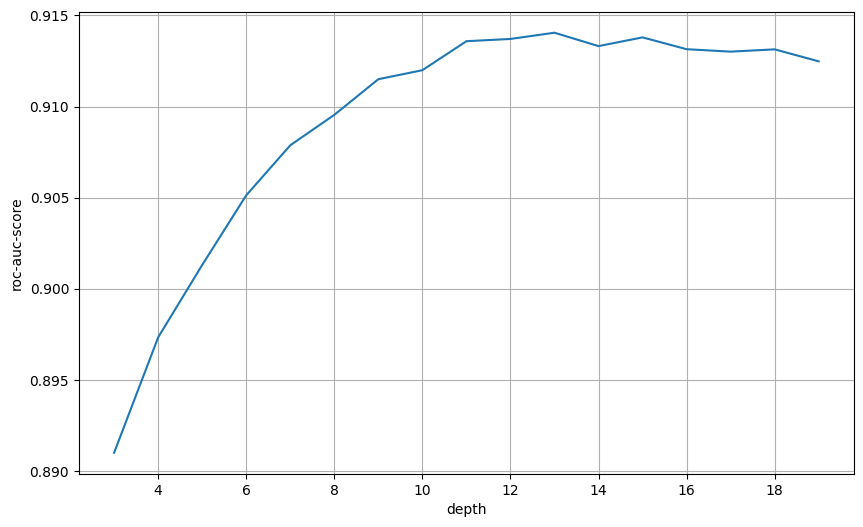

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(3, 20), rf_metrics)
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()

In [66]:
max([(rf_metrics[i - 3], i) for i in range(3, 20)])

(0.9140483329074698, 13)

### Задание
Обучить с лучшей подобронной глубинной и сделать предикты на тестовую и тренировочную выборку

In [103]:
best_depth = 12

model = RandomForestClassifier(n_estimators=100, max_depth=best_depth)

model.fit(train_data_for_forest, y_train)

train_y_pred_forest = model.predict_proba(train_data_for_forest)[:, 1]
test_y_pred_forest = model.predict_proba(test_data_for_forest)[:, 1]

### Задание
Вычислим ROC-AUC на об. и тест. множенстве

In [104]:
from sklearn.metrics import roc_curve, roc_auc_score

In [105]:
train_auc = roc_auc_score(y_train, train_y_pred_forest)
test_auc = roc_auc_score(y_test, test_y_pred_forest)

In [106]:
train_auc

0.9557716414130544

In [107]:
test_auc

0.9130541682673837

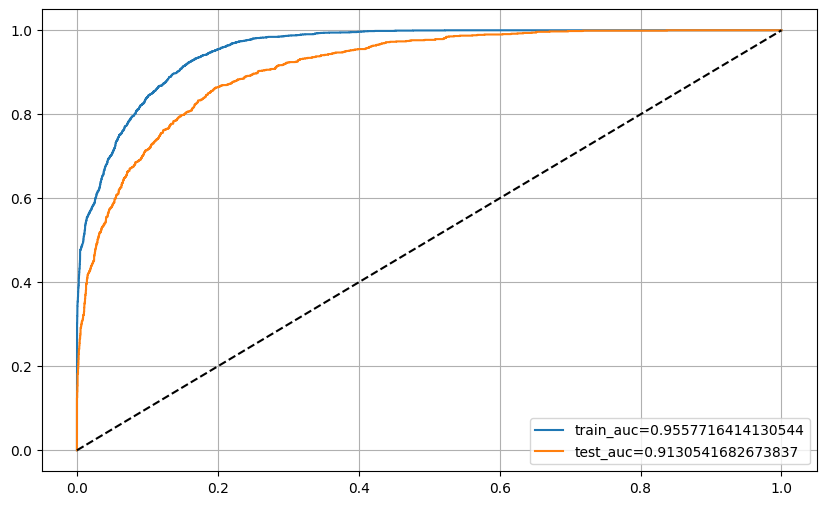

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_train, train_y_pred_forest)[:2],
         label=f'train_auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_forest)[:2],
        label=f'test_auc={test_auc}')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.legend()
plt.grid()

### Задание
Создать датасет `scoring_data_for_forest` и предсказать на нем целевую переменную

In [118]:
scoring_data_for_forest = pd.concat([scoring_real_data, scoring_one_hot_data], axis='columns')

In [119]:
scoring_data_for_forest.columns = scoring_data_for_forest.columns.astype(str)

In [120]:
scoring_y_pred_forest = model.predict_proba(scoring_data_for_forest)[:, 1]

In [122]:
with open('scoring_y_pred_forest.txt', 'w') as f:
    f.write(', '.join([str(item) for item in scoring_y_pred_forest]))

Для посылки на kaggle обычно используют функцию `.to_csv`, как ниже, но нам этот код не понадобится:


In [ ]:
pd.Series(scoring_y_pred_forest).to_csv('scoring_y_pred_forest.csv', header=None, index=None)

## Часть 3. Обучение градиентного бустинга

In [123]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.5 MB/s eta 0:00:00


In [124]:
from catboost import CatBoostClassifier, Pool, cv

### Задание
Заполнить пропуски в данных `train_cat_data` и `test_cat_data` значением `'unknown'`

In [134]:
train_cat_data = train_cat_data.fillna('unknown')
test_cat_data = test_cat_data.fillna('unknown')

In [154]:
train_cat_data.columns = train_cat_data.columns.astype(str)
test_cat_data.columns = test_cat_data.columns.astype(str)

### Задание
Создать новые наборы для обучения и тестов

In [155]:
train_data_for_boosting = pd.concat([train_real_data, train_cat_data], axis='columns')
test_data_for_boosting = pd.concat([test_real_data, test_cat_data], axis='columns')

cat_features = np.arange(train_cat_data.shape[1]) + train_real_data.shape[1]

train_dataset = Pool(data=train_data_for_boosting,
                     label=y_train,
                     cat_features=cat_features)

test_dataset = Pool(data=test_data_for_boosting,
                    label=y_test,
                    cat_features=cat_features)

In [ ]:
'''
depths = np.arange(3, 17)
boosting_metrics = []

for depth in depths:
    params = {"iterations": 100,
              "depth": depth,
              "loss_function": "Logloss",
              "custom_loss": "AUC",
              "verbose": False}
    
    scores = cv(pool=train_dataset, params=params, fold_count=5)

    boosting_metrics.append(scores['test-AUC-mean'].mean())
'''

In [148]:
boosting_metrics

[0.8994979091667605,
 0.9017244011949412,
 0.9053388030158565,
 0.9066248368380667,
 0.9081448576257116,
 0.909262433828529,
 0.9083375916826714,
 0.9097418140540424,
 0.911300574078389,
 0.9096951824663817,
 0.9087581063755568,
 0.9095857195822852,
 0.9082054242744568,
 0.9084352686351929]

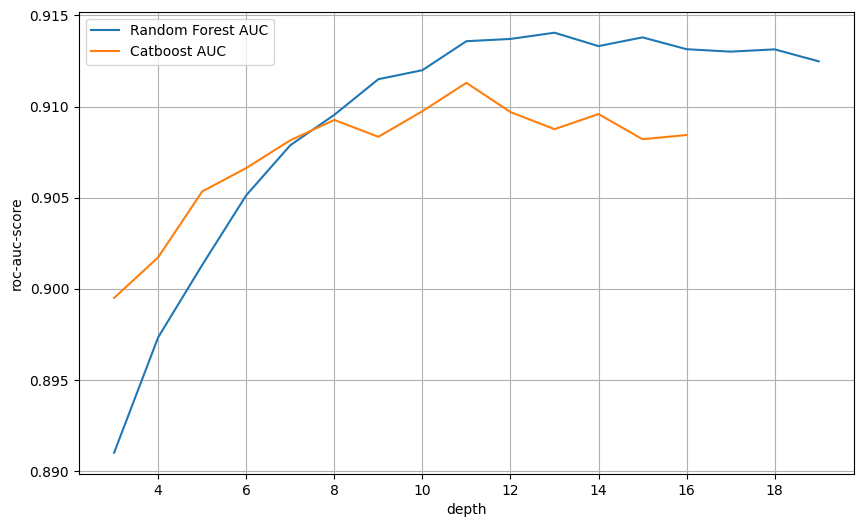

In [149]:
'''plt.figure(figsize=(10, 6))
plt.plot(np.arange(3, 20), rf_metrics, label='Random Forest AUC')
plt.plot(np.arange(3, 17), boosting_metrics, label='Catboost AUC')
plt.xlabel('depth')
plt.ylabel('roc-auc-score')
plt.grid()
plt.legend()'''

### Задание
Обучить для этой глубины модель

In [170]:
best_depth = 10

model = CatBoostClassifier(iterations=500,
                           depth=best_depth,
                           loss_function='Logloss',
                           verbose=False)

model.fit(train_dataset)

train_y_pred_boosting = model.predict_proba(train_data_for_boosting)[:, 1]
test_y_pred_boosting = model.predict_proba(test_data_for_boosting)[:, 1]

In [171]:
train_y_pred_boosting = model.predict_proba(train_data_for_boosting)[:, 1]
test_y_pred_boosting = model.predict_proba(test_data_for_boosting)[:, 1]
train_auc = roc_auc_score(y_train, train_y_pred_boosting)
test_auc = roc_auc_score(y_test, test_y_pred_boosting)

In [172]:
test_auc 

0.9151088541432681

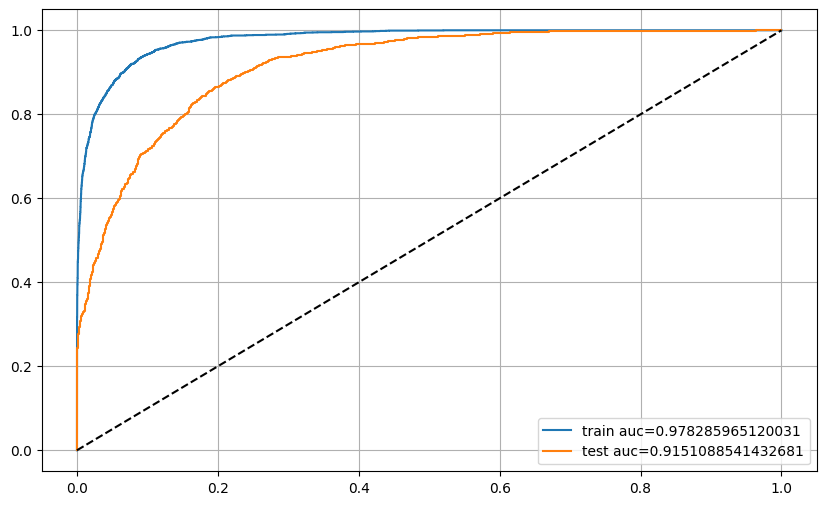

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_train, train_y_pred_boosting)[:2],
         label=f'train auc={train_auc}')
plt.plot(*roc_curve(y_test, test_y_pred_boosting)[:2],
         label=f'test auc={test_auc}')

plt.plot([0, 1], [0, 1], '--', color='black')

plt.legend()
plt.grid()

### Задание
Применить построенную модуль к данным `scoring_data`

In [175]:
scoring_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1546 non-null   int64 
 1   workclass       1477 non-null   object
 2   fnlwgt          1546 non-null   int64 
 3   education       1546 non-null   object
 4   education-num   1546 non-null   int64 
 5   marital-status  1546 non-null   object
 6   occupation      1477 non-null   object
 7   relationship    1546 non-null   object
 8   race            1546 non-null   object
 9   sex             1546 non-null   object
 10  capital-gain    1546 non-null   int64 
 11  capital-loss    1546 non-null   int64 
 12  hours-per-week  1546 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 157.1+ KB


In [179]:
real = [column for column in scoring_data.columns if np.dtype(scoring_data[column]) != 'object']
real_data = scoring_data[real]

In [186]:
cat = [column for column in scoring_data.columns if np.dtype(scoring_data[column]) == 'object']
cat_data = scoring_data[cat]




In [190]:
cat_data = cat_data.fillna('unknown')

In [191]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       1546 non-null   object
 1   education       1546 non-null   object
 2   marital-status  1546 non-null   object
 3   occupation      1546 non-null   object
 4   relationship    1546 non-null   object
 5   race            1546 non-null   object
 6   sex             1546 non-null   object
dtypes: object(7)
memory usage: 84.7+ KB


In [192]:
data = pd.concat([real_data, cat_data], axis='columns')

In [193]:
cat_feat = np.arange(cat_data.shape[1]) + real_data.shape[1]

scoring_dataset = Pool(data=data,
                       cat_features=cat_feat)

In [196]:
scoring_y_pred_boosting = model.predict_proba(scoring_dataset)[:, 1]

In [197]:
with open('scoring_y_pred_boosting.txt', 'w') as f:
    f.write(', '.join([str(item) for item in scoring_y_pred_boosting]))